In [431]:
import pandas as pd
import numpy as np
import random
import math
from tqdm import tqdm

In [432]:
data = pd.read_csv('../data/Zoo.csv')
feature_columns = [ col for col in data.columns if col not in ['id','target']]
# for col in feature_columns:
#     data[col] = pd.qcut(data[col], q=5, labels=False, duplicates='drop')
print(data[feature_columns].nunique())
# encode labels column to numbers
# y = data['outcome']

hair        2
feathers    2
eggs        2
milk        2
airborne    2
aquatic     2
predator    2
toothed     2
backbone    2
breathes    2
venomous    2
fins        2
legs        6
tail        2
domestic    2
catsize     2
dtype: int64


In [433]:
len(data)

101

In [434]:
def calculate_equivalence_classes(data, condition_attrs):
    # 取出条件属性的列索引
    # 设置条件属性为索引
    # print(condition_attrs)
    data_indexed = data.set_index(condition_attrs)
    # 按照索引分组并将分组内结果合并为列表
    equivalence_classes = data_indexed.groupby(level=condition_attrs)[data.columns[0]].apply(list).to_dict()
    return equivalence_classes

In [435]:
def fitness_function(feature_columns,data,decision_attr):
    # 计算D的信息熵
    total_records = len(data)
    decision_counts = data[decision_attr].value_counts()
    decision_prob = decision_counts / total_records
    entropy_D = -(decision_prob * np.log2(decision_prob)).sum()

    equivalence_classes = calculate_equivalence_classes(data,feature_columns)
    equivalence_classes_dec = calculate_equivalence_classes(data, decision_attr)

    entropy_DB = 0
    rule_confidences=0
    total_samples=0
    total_rule=0
    for equivalence_class in equivalence_classes.values():
        if len(equivalence_class)>total_records*0.01:
            total_samples=total_samples+len(equivalence_class)
            total_rule=total_rule+1
            a=[]
            for key_decision in equivalence_classes_dec.keys():
                x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
                y = 1-len(x) / len(equivalence_class)
                a.append(y)
            max_rule = min(a)
            rule_confidences=rule_confidences+max_rule
    print(rule_confidences)
    print(total_rule)
    print(rule_confidences/total_rule)
    print(total_samples)

    for equivalence_class in equivalence_classes.values():
        class_size = len(equivalence_class)
        class_prob = class_size / total_records
        for key_decision in equivalence_classes_dec.keys():
            x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
            print(x)
            if len(x)>0:
                decision_prob = len(x) / class_size
                entropy_DB -= class_prob * decision_prob * math.log(decision_prob, 2)

    print(entropy_DB)

    # if total_rule/total_records<0.4:
    #     return 1+0*(entropy_D-entropy_DB)

    # print(entropy_D-entropy_DB)
    # avg_confidence = rule_confidences/count+0*(entropy_D-entropy_DB)
    return rule_confidences/total_rule

In [436]:
feature_columns=['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
feature_columns1=['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail']
feature_columns2=['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins']
feature_columns3=['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes']
feature_columns4=['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed']
feature_columns5=['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic']
feature_columns6=['hair', 'feathers', 'eggs', 'milk']
feature_columns7=['hair', 'feathers']
feature_columns8=['feathers', 'eggs', 'toothed', 'breathes', 'venomous', 'legs', 'tail', 'domestic', 'catsize']
feature_columns9=['hair', 'eggs', 'milk', 'aquatic', 'backbone', 'venomous', 'legs', 'catsize']
feature_columns10=['feathers', 'milk', 'airborne', 'toothed', 'fins', 'tail', 'domestic']
feature_columns11=['hair', 'eggs', 'milk', 'aquatic', 'backbone', 'venomous', 'legs', 'catsize']
feature_columns12=['airborne', 'aquatic', 'predator', 'toothed', 'breathes', 'legs', 'tail', 'domestic']
feature_columns13=['milk', 'domestic', 'catsize']
feature_columns14=['hair', 'eggs', 'milk', 'airborne', 'aquatic', 'toothed', 'backbone', 'breathes', 'legs', 'tail']
feature_columns15=['feathers', 'milk', 'airborne', 'predator', 'breathes', 'venomous', 'fins', 'domestic']
feature_columns16=['feathers', 'eggs', 'toothed', 'backbone', 'breathes', 'fins', 'catsize']
feature_columns17=['hair', 'eggs', 'milk', 'aquatic', 'backbone', 'venomous', 'legs', 'catsize']
feature_columns18=['aquatic', 'predator', 'toothed', 'venomous', 'fins', 'tail', 'catsize']

#59 0
#45 0
#32 0.01516 2
#26 0.0308641975308642 2
#23 0.01956
#14 0.03105
#5 0.08333 2
#2 0.0465
print(fitness_function(feature_columns1,data,'target'))

0.0
18
0.0
74
set()
set()
set()
set()
set()
set()
{72}
set()
set()
{76}
set()
set()
set()
set()
{66, 20}
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
{81, 99}
set()
set()
set()
set()
set()
{88, 25}
set()
set()
set()
{90}
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
{14}
set()
set()
{80}
set()
set()
set()
set()
set()
set()
{91}
set()
set()
set()
set()
set()
set()
{62}
set()
set()
set()
set()
set()
set()
set()
{8, 73, 34, 82}
set()
set()
set()
set()
set()
set()
set()
{89}
set()
set()
set()
set()
set()
set()
set()
set()
{15}
set()
set()
set()
set()
set()
set()
{85}
set()
set()
set()
set()
set()
set()
{16, 46}
set()
set()
set()
set()
set()
set()
{53}
set()
set()
set()
set()
set()
set()
{77}
set()
set()
set()
{3, 38, 9, 13, 92, 19, 60, 61}
set()
set()
set()
set()
set()
set()
{86}
set()
set()
set()
set()
set()
set()
set()
{26}
set()
set()
set()
set()
set()
set()
{52}
set()
set()
set()
set()
set()
set()
{26}
set()
set()
set()
set()
set()
set()
set()
{

In [437]:
a=[0. , 0.1 ,0.2, 0.3, 0.4, 0.5 ,0.6 ,0.7 ,0.8, 0.9 ,1. ]
b=[]
x=0.2503059975520196
y=1.3441983887032758

for i in a:
    b.append(x + i * y)
print(b)

[0.2503059975520196, 0.38472583642234714, 0.5191456752926747, 0.6535655141630023, 0.7879853530333298, 0.9224051919036576, 1.056825030773985, 1.1912448696443125, 1.3256647085146402, 1.460084547384968, 1.5945043862552954]


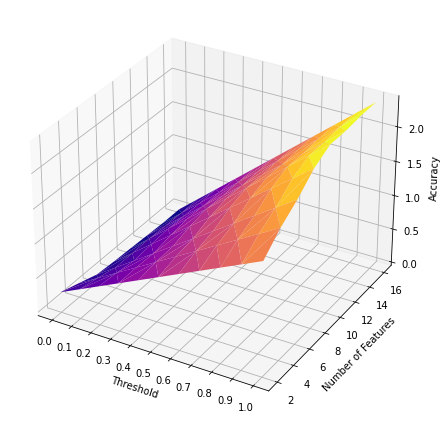

In [438]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y = [2,4,6,8,10,12,14,16]
X, Y = np.meshgrid(x, y)
data=np.array([
    [0.2503059975520196, 0.38472583642234714, 0.5191456752926747, 0.6535655141630023, 0.7879853530333298, 0.9224051919036576, 1.056825030773985, 1.1912448696443125, 1.3256647085146402, 1.460084547384968, 1.5945043862552954],
    [0.1596638655462185, 0.32694127445851084, 0.4942186833708031, 0.6614960922830954, 0.8287735011953877, 0.99605091010768, 1.1633283190199724, 1.3306057279322647, 1.497883136844557, 1.6651605457568492, 1.8324379546691416],
    [0.06602254428341385, 0.2606008672635633, 0.45517919024371273, 0.6497575132238621, 0.8443358362040115, 1.038914159184161, 1.2334924821643105, 1.42807080514446, 1.6226491281246094, 1.8172274511047588, 2.011805774084908],
    [0.04374999999999999, 0.26288067769096285, 0.4820113553819257, 0.7011420330728884, 0.9202727107638513, 1.139403388454814, 1.3585340661457768, 1.5776647438367395, 1.7967954215277027, 2.0159260992186656, 2.2350567769096283],
    [0.0308641975308642, 0.26480142813507773, 0.4987386587392913, 0.7326758893435048, 0.9666131199477184, 1.2005503505519317, 1.4344875811561453, 1.6684248117603586, 1.9023620423645724, 2.136299272968786, 2.3702365035729995],
    [0.015151515151515152, 0.2502470873413151, 0.48534265953111505, 0.7204382317209149, 0.955533803910715, 1.190629376100515, 1.4257249482903147, 1.6608205204801147, 1.8959160926699148, 2.131011664859715, 2.3661072370495146],
[0.0, 0.23905596822940392, 0.47811193645880784, 0.7171679046882117, 0.9562238729176157, 1.1952798411470196, 1.4343358093764234, 1.6733917776058274, 1.9124477458352314, 2.1515037140646354, 2.390559682294039],
[0.0, 0.23905596822940392, 0.47811193645880784, 0.7171679046882117, 0.9562238729176157, 1.1952798411470196, 1.4343358093764234, 1.6733917776058274, 1.9124477458352314, 2.1515037140646354, 2.390559682294039]

])

fig = plt.figure(figsize=(6,6))  # Set the size of the figure in inches
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), data.flatten(), cmap='plasma')

# Set the axis labels
ax.set_xlabel('Threshold')
ax.set_ylabel('Number of Features')
ax.set_zlabel('Accuracy')

# Customize the tick labels
x_ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y_ticks = [2,4,6,8,10,12,14,16]

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Save the plot in IEEE format
plt.tight_layout()
plt.savefig('test2.png', bbox_inches='tight',dpi=300)

# Show the plot in the console
plt.show()